# PROJECT PYTHON

In [89]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

## Шаг 1: Выбор темы проекта

Цель нашего проекта - спарсить данные с сайта IMDb о 1000 фильмах из топ-1000 по рейтингу, провести проразведочный анализ данных, EDA, выдвинуть гипотезы, проверить эти гипотезы с помощью математической статистики, попробовать предсказать переменную, проанализировать получившиеся результаты и сделать выводы. 

## Шаг 2: Парсинг данных

 Мы вынесли этот шаг в отдельный блок (файл "IMDb Parcing" лежит на GitHub), в результате сохранили полученный датафрейм в формате CSV для дальнейшей обработки (первоначальный датасет также лежит на GitHub под названием 'IMDbData').

In [90]:
df = pd.read_csv('IMDbData.csv')
df.head()

,Unnamed: 0,Movie Name,Year of Release,Runtime,Genre,Movie Rating,Metascore of Movie,Votes,Gross,Description
0,0,Guardians of the Galaxy Vol. 3,2023,150,"Action, Adventure, Comedy",8.2,64,156973,#158,"Still reeling from the loss of Gamora, Peter Q..."
1,1,John Wick: Chapter 4,2023,169,"Action, Crime, Thriller",8.0,78,190955,NaN,John Wick uncovers a path to defeating The Hig...
2,2,Spider-Man: Across the Spider-Verse,2023,140,"Animation, Action, Adventure",9.1,86,50471,#16,"Miles Morales catapults across the Multiverse,..."
3,3,Guardians of the Galaxy,2014,121,"Action, Adventure, Comedy",8.0,76,1219591,$333.18M,A group of intergalactic criminals must pull t...
4,4,Avatar: The Way of Water,2022,192,"Action, Adventure, Fantasy",7.7,67,387792,$659.68M,Jake Sully lives with his newfound family form...


## Шаг 3: Предварительная обработка

In [91]:
# преобразуем переменный в числовой формат
df['Year of Release'] = df['Year of Release'].apply(int)
df['Runtime'] = df['Runtime'].apply(int)
df['Movie Rating'] = df['Movie Rating'].apply(float)
df['Metascore of Movie'] = df['Metascore of Movie'].apply(int)
df['Votes'] = df['Votes'].apply(int)

In [92]:
# преобразуем переменную Gross в числовой формат, предварительно убрав лишние данные, которые начинаются с "#"
df['Gross'] = df['Gross'].apply(lambda x: float(x.replace('$', '').replace('M', '').replace('#', '')) if isinstance(x, str) and x != '' else x)
df['Gross'] = df['Gross'].replace('', pd.NA)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

In [93]:
df.head(3)

,Unnamed: 0,Movie Name,Year of Release,Runtime,Genre,Movie Rating,Metascore of Movie,Votes,Gross,Description
0,0,Guardians of the Galaxy Vol. 3,2023,150,"Action, Adventure, Comedy",8.2,64,156973,158.0,"Still reeling from the loss of Gamora, Peter Q..."
1,1,John Wick: Chapter 4,2023,169,"Action, Crime, Thriller",8.0,78,190955,NaN,John Wick uncovers a path to defeating The Hig...
2,2,Spider-Man: Across the Spider-Verse,2023,140,"Animation, Action, Adventure",9.1,86,50471,16.0,"Miles Morales catapults across the Multiverse,..."


In [94]:
# проверяем типы объектов в датафрейме
df.dtypes

Unnamed: 0              int64
Movie Name             object
Year of Release         int64
Runtime                 int64
Genre                  object
Movie Rating          float64
Metascore of Movie      int64
Votes                   int64
Gross                 float64
Description            object
dtype: object

In [95]:
#Обработаем категориальную переменную жанр: преобразуем столбец в 3 столбца, по количеству жанров, описанных на сайте
df[['Genre 1', 'Genre 2']] = df['Genre']. str.split(',', 1 , expand= True )
df[['Genre 2', 'Genre 3']] = df['Genre 2']. str.split(',', 1 , expand= True )
df.head()

,Unnamed: 0,Movie Name,Year of Release,Runtime,Genre,Movie Rating,Metascore of Movie,Votes,Gross,Description,Genre 1,Genre 2,Genre 3
0,0,Guardians of the Galaxy Vol. 3,2023,150,"Action, Adventure, Comedy",8.2,64,156973,158.00,"Still reeling from the loss of Gamora, Peter Q...",Action,Adventure,Comedy
1,1,John Wick: Chapter 4,2023,169,"Action, Crime, Thriller",8.0,78,190955,NaN,John Wick uncovers a path to defeating The Hig...,Action,Crime,Thriller
2,2,Spider-Man: Across the Spider-Verse,2023,140,"Animation, Action, Adventure",9.1,86,50471,16.00,"Miles Morales catapults across the Multiverse,...",Animation,Action,Adventure
3,3,Guardians of the Galaxy,2014,121,"Action, Adventure, Comedy",8.0,76,1219591,333.18,A group of intergalactic criminals must pull t...,Action,Adventure,Comedy
4,4,Avatar: The Way of Water,2022,192,"Action, Adventure, Fantasy",7.7,67,387792,659.68,Jake Sully lives with his newfound family form...,Action,Adventure,Fantasy


In [96]:
df = df.drop('Genre', axis=1)

In [97]:
df.head(3)

,Unnamed: 0,Movie Name,Year of Release,Runtime,Movie Rating,Metascore of Movie,Votes,Gross,Description,Genre 1,Genre 2,Genre 3
0,0,Guardians of the Galaxy Vol. 3,2023,150,8.2,64,156973,158.0,"Still reeling from the loss of Gamora, Peter Q...",Action,Adventure,Comedy
1,1,John Wick: Chapter 4,2023,169,8.0,78,190955,NaN,John Wick uncovers a path to defeating The Hig...,Action,Crime,Thriller
2,2,Spider-Man: Across the Spider-Verse,2023,140,9.1,86,50471,16.0,"Miles Morales catapults across the Multiverse,...",Animation,Action,Adventure


## Информация о полученном датасете:

__Переменные:__

- `Movie Name` - название фильма
- `Year of Release` - год выпуска
- `Runtime` - продолжительность, в минутах
- `Genre 1, Genre 2, Genre 3` - жанры
- `Movie Rating` - рейтинг фильма
- `Metascore of Movie` - "considered the rating of a film", фильмы получат Metascore только в том случае, если будут собраны по крайней мере четыре рецензии критиков
- `Votes` - количество голосов
- `Gross` - "кассовость", сумма денег с проката
- `Description` - описание фильма

У каждого фильма указан как минимум один жанр (Столбец Genre 1 заполнен полностью). Два жанра или три - опционально, но у большинства фильмов указано 3 жанра.

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1000 non-null   int64  
 1   Movie Name          1000 non-null   object 
 2   Year of Release     1000 non-null   int64  
 3   Runtime             1000 non-null   int64  
 4   Movie Rating        1000 non-null   float64
 5   Metascore of Movie  1000 non-null   int64  
 6   Votes               1000 non-null   int64  
 7   Gross               842 non-null    float64
 8   Description         1000 non-null   object 
 9   Genre 1             1000 non-null   object 
 10  Genre 2             890 non-null    object 
 11  Genre 3             639 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [99]:
df.describe()

,Unnamed: 0,Year of Release,Runtime,Movie Rating,Metascore of Movie,Votes,Gross
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1.000000e+03,842.000000
mean,499.500000,1991.6520,124.120000,7.969000,66.631000,3.166115e+05,73.906722
std,288.819436,24.1193,28.716445,0.276614,30.704912,3.827924e+05,116.758319
min,0.000000,1920.0000,45.000000,7.600000,0.000000,2.568000e+04,0.000000
25%,249.750000,1975.0000,103.000000,7.800000,64.750000,6.203475e+04,3.482500
50%,499.500000,1999.0000,120.000000,7.900000,77.000000,1.570665e+05,25.475000
75%,749.250000,2011.0000,138.000000,8.100000,86.000000,4.377068e+05,98.092500
max,999.000000,2023.0000,321.000000,9.300000,100.000000,2.747322e+06,936.660000


In [100]:
df.isna().sum()

Unnamed: 0              0
Movie Name              0
Year of Release         0
Runtime                 0
Movie Rating            0
Metascore of Movie      0
Votes                   0
Gross                 158
Description             0
Genre 1                 0
Genre 2               110
Genre 3               361
dtype: int64

В данных есть пропущенные значения по переменной Gross. Это связано с тем, что данная информация не была предоставлена сайту imdb. Отсутствующее значение Gross для фильма не говорит о том, что он не собрал определенную сумму денег.

Мы решили, что заполнять пропущенные ячейки средним значением Gross по всей выборке или по жанрам не релевантно, тк у каждого фильма определенные характеристики, поэтому и Gross формируется в зависимости от года выпуска фильма, режиссера, актерского состава, и многих других факторов. Таким образом, оптимальным вариантом будет не заполнять пропущенные значения. Это позволит в дальнейшем сделать нашу модель полноценной и не исказит анализ


In [101]:
df['Gross'].fillna(0, inplace=True)
df.isna().sum()

Unnamed: 0              0
Movie Name              0
Year of Release         0
Runtime                 0
Movie Rating            0
Metascore of Movie      0
Votes                   0
Gross                   0
Description             0
Genre 1                 0
Genre 2               110
Genre 3               361
dtype: int64

## Шаг 4: Exploratory Data Analysis (EDA)

Подгрузим библиотеки для визуализации данных и работы с графиками

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

### Описательные статистики

Нам необходимо получить четкую картину о рапределении данных в датасете

Построим графики распределения переменных

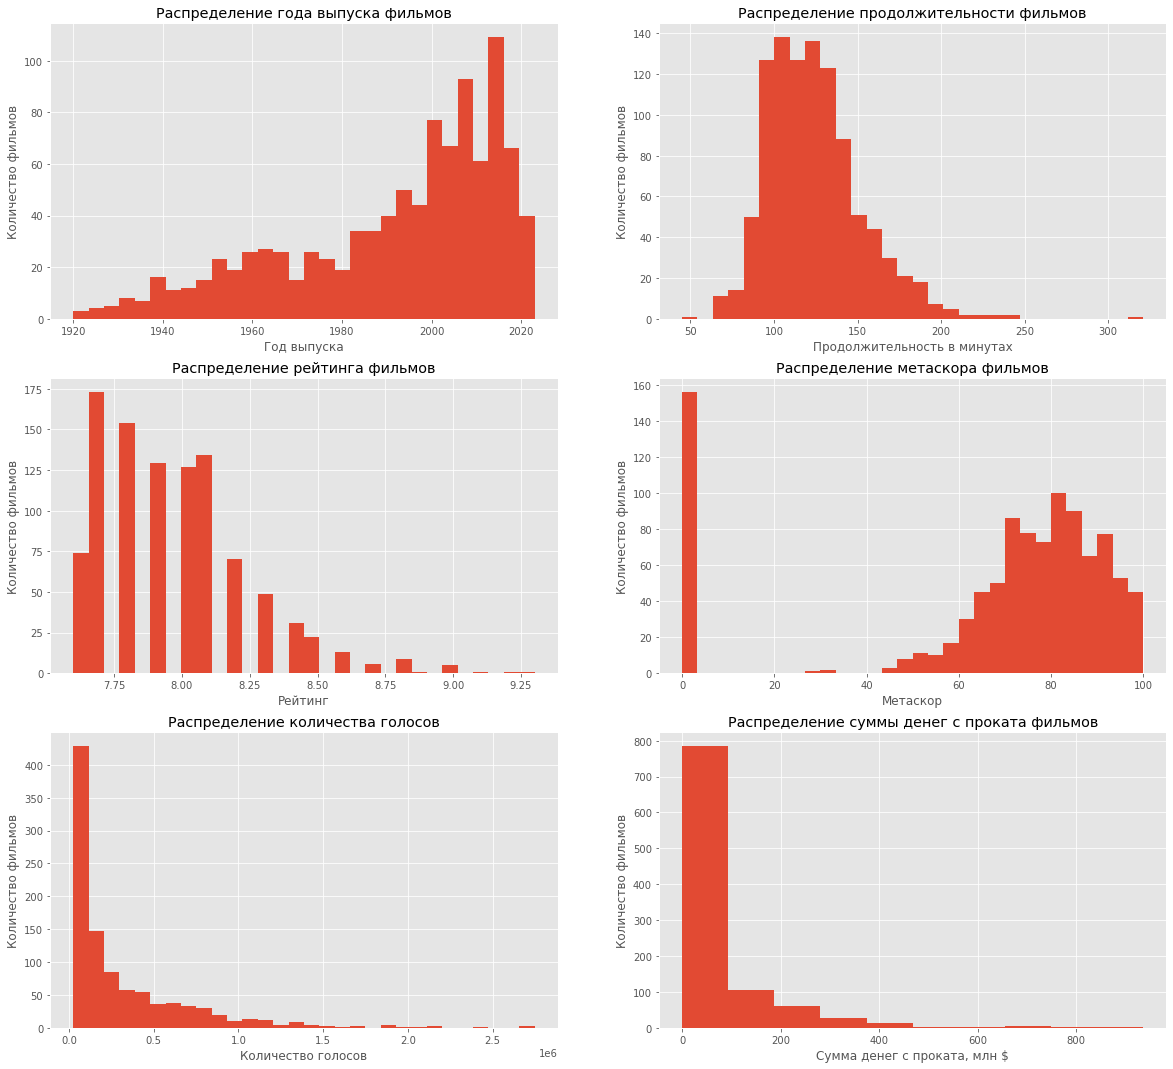

In [103]:
plt.figure(figsize=(20, 25))

sp = plt.subplot(421)
df['Year of Release'].hist(bins=30)
plt.xlabel('Год выпуска')
plt.ylabel('Количество фильмов')
plt.title('Распределение года выпуска фильмов');

sp = plt.subplot(422)
df['Runtime'].hist(bins=30)
plt.xlabel('Продолжительность в минутах')
plt.ylabel('Количество фильмов')
plt.title('Распределение продолжительности фильмов');

sp = plt.subplot(423)
df['Movie Rating'].hist(bins=30)
plt.xlabel('Рейтинг')
plt.ylabel('Количество фильмов')
plt.title('Распределение рейтинга фильмов');

sp = plt.subplot(424)
df['Metascore of Movie'].hist(bins=30)
plt.xlabel('Метаскор')
plt.ylabel('Количество фильмов')
plt.title('Распределение метаскора фильмов');

sp = plt.subplot(425)
df['Votes'].hist(bins=30)
plt.xlabel('Количество голосов')
plt.ylabel('Количество фильмов')
plt.title('Распределение количества голосов');

sp = plt.subplot(426)
df['Gross'].hist(bins=10)
plt.xlabel('Сумма денег с проката, млн $')
plt.ylabel('Количество фильмов')
plt.title('Распределение суммы денег с проката фильмов');


* Распределение года выпуска фильмов похоже на распределение с отклонением вправо. Это говорит о том, что в рейтинге преимущественно находятся фильмы 1990-2020 гг.
* Распределение продолжительности фильмов похоже на нормальное с медианой 120, средним 124. Большинство фильмов имеют длительность от 90 до 120 минут
* Распределение рейтинга фильмов похоже на распределение с отклонением влево
* Распределение метаскора фильма не похоже на типовое. 156 фильмов имеют метаскор 0
* Распределение количества голосов похоже на экспоненциальное распределение
* Распределение суммы денег с проката фильмов также похоже на экспоненциальное распределение с максимальным значением 936.66

Посмотрим на распредление жанров фильмов

In [104]:
# в столбцах Genre 1, Genre 2, Genre 3 находятся данные по жанрам фильмов, они могут повторяться. Соберем информацию по всем жанрам
numer = pd.concat([df['Genre 1'], df['Genre 2'], df['Genre 3']])
numer.dropna()
genre_counts = numer.dropna().str.strip().value_counts()
genre_counts

Drama        732
Comedy       230
Action       207
Crime        205
Adventure    190
Thriller     138
Romance      124
Biography    106
Mystery      103
Animation     84
Sci-Fi        67
Fantasy       62
Family        52
War           50
History       45
Horror        33
Music         31
Film-Noir     22
Western       17
Musical       16
Sport         15
dtype: int64

Построим график pie для распределения жанров

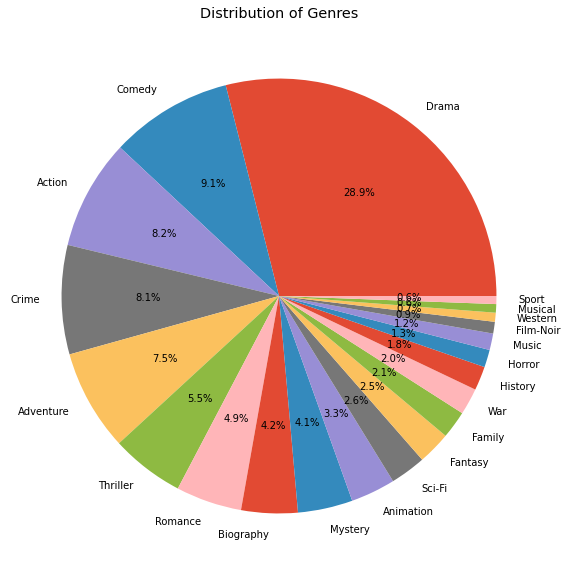

In [105]:
plt.figure(figsize=(10, 10))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Genres')
plt.show()

По графику видно, что наибольшую долю (28.9%) занимают Драмы. Далее идут Комедии (9.1%). Затем Боевики (8.2%)

Сделаем другой тип визуализации жанров с помощью treemap:

In [106]:
!pip install squarify
import squarify

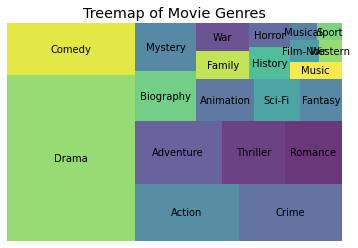

In [107]:
squarify.plot(sizes=genre_counts, label=genre_counts.index, alpha=0.8)
plt.axis('off')
plt.title('Treemap of Movie Genres')
plt.show()

Исследуем наиболее часто встречающиеся слова в описании к фильмам. Для этого построим word cloud:
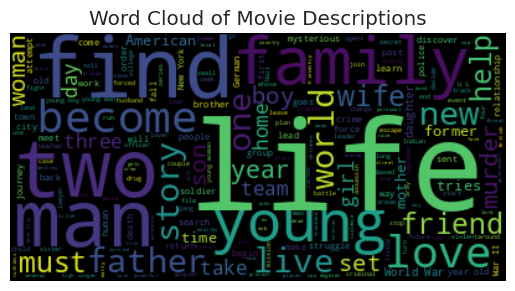

Исследуем динамику рейтинга фильмов

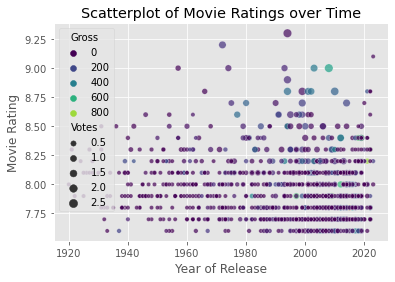

In [108]:
sns.scatterplot(data=df, x='Year of Release', y='Movie Rating', size='Votes', hue='Gross', palette = "viridis", alpha=0.7)
plt.xlabel('Year of Release')
plt.ylabel('Movie Rating')
plt.title('Scatterplot of Movie Ratings over Time')
plt.show()

На представленной диаграмме размер точек зависит от количества голосов (Votes), а цвет точек - от кассовых сборов (Gross). По графику видно, что начиная с 1970 года все больше фильмов стали получать рейтинг 8.5 и выше

Продолжаем исследовать метрики фильмов в динамике

Построим график, показывающий суммарную выручку фильмов по годам

<AxesSubplot:xlabel='Year of Release'>

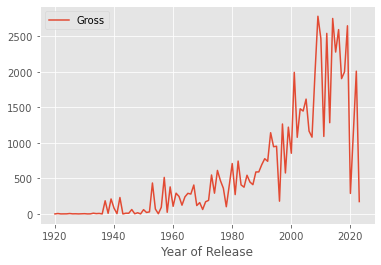

In [109]:
revenue_df = df[['Gross'] + ['Year of Release']]
revenue_df.groupby('Year of Release').sum().plot()

По графику видно, что в 1994-96 годах выручка была минимальной, как и в 2020 году

Рассмотрим динамику рейтинга фильмов в зависимости от года выпуска

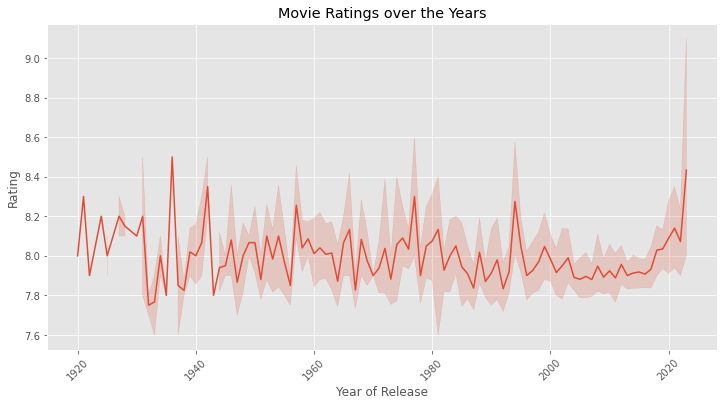

In [110]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year of Release', y='Movie Rating')
plt.title('Movie Ratings over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

На графике четко прослеживаются пики высоких рейтингов фильмов, выпущенных в 1935-1938, 1941-1942, 1997-1998, 2020-2023

### Зависимости переменных и взаимосвязи

Далее будем смотреть на зависимости между переменными. Это позволит нам сделать микро-выводы по данным и выдвинуть гипотезы

In [111]:
df.corr()

,Unnamed: 0,Year of Release,Runtime,Movie Rating,Metascore of Movie,Votes,Gross
Unnamed: 0,1.000000,-0.282037,-0.147279,-0.174157,-0.415489,-0.700249,-0.490379
Year of Release,-0.282037,1.000000,0.216028,-0.076231,-0.079054,0.239524,0.219455
Runtime,-0.147279,0.216028,1.000000,0.270322,-0.076205,0.158828,0.128493
Movie Rating,-0.174157,-0.076231,0.270322,1.000000,-0.048196,0.478036,0.119538
Metascore of Movie,-0.415489,-0.079054,-0.076205,-0.048196,1.000000,0.240386,0.159026
Votes,-0.700249,0.239524,0.158828,0.478036,0.240386,1.000000,0.574639
Gross,-0.490379,0.219455,0.128493,0.119538,0.159026,0.574639,1.000000


Построим heatmap для визуализации корреляций между числовыми переменными

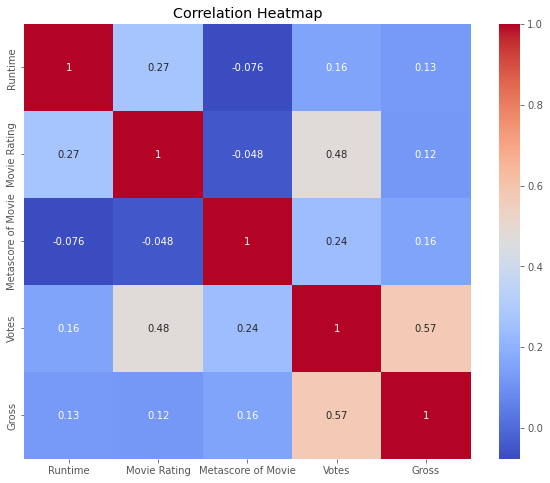

In [112]:
corr_matrix = df[['Runtime', 'Movie Rating', 'Metascore of Movie', 'Votes', 'Gross']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

По корреляционной матрице видна наибольшая положительная связь переменных Votes и Gross 0.55

Построим pairplot (диаграммы рассеяния) для признаков: Runtime, Movie Rating, Metascore of Movie, Votes, Gross, Year of Release

<Figure size 864x432 with 0 Axes>

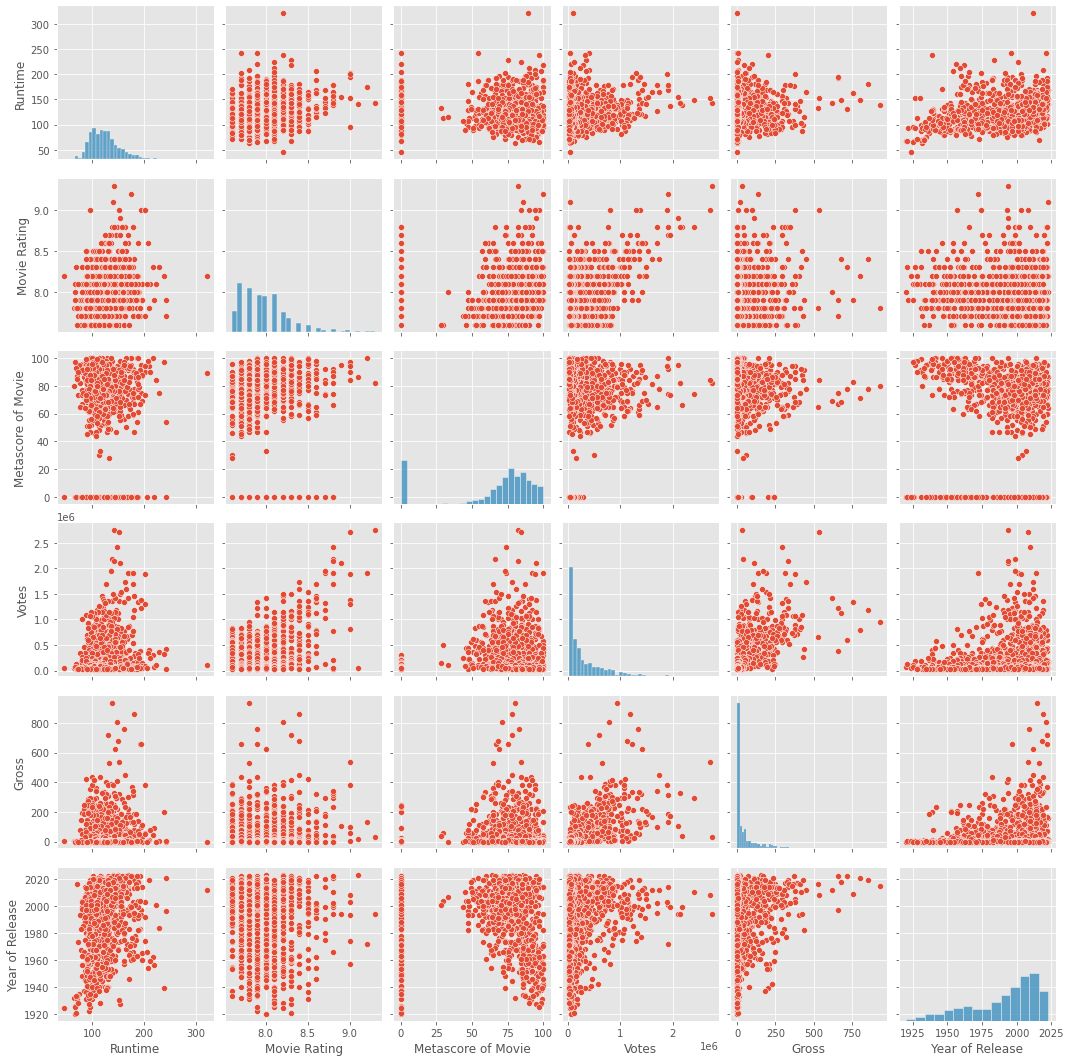

In [113]:
plt.figure(figsize=(12, 6))
sns.pairplot(df[['Runtime', 'Movie Rating', 'Metascore of Movie', 'Votes', 'Gross', 'Year of Release']])
plt.show()

По графикам мы можем увидеть положительную связь переменных Gross и Votes, Movie Rating и Votes. Также мы можем сделать вывод, что наибольшим значениям Metascore соответсвуют наименьшие занчения Votes и Gross

Далее посмотрим на то, какие жанры были популярны в разные периоды времени. Для этого построим heatmap с группировкой по жанрам и годам.

In [114]:
genre_counts_1 = pd.DataFrame({
    'genre': genre_counts.index,
    'count': genre_counts.values
})

genre_counts_1

,genre,count
0,Drama,732
1,Comedy,230
2,Action,207
3,Crime,205
4,Adventure,190
5,Thriller,138
6,Romance,124
7,Biography,106
8,Mystery,103
9,Animation,84


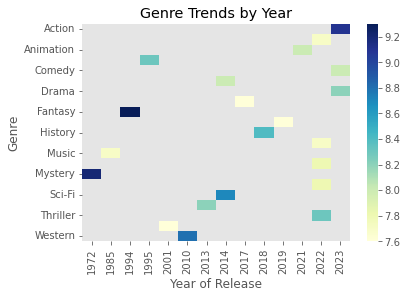

In [115]:
genre_year_matrix = df.pivot_table(index=genre_counts_1['genre'], columns='Year of Release', values='Movie Rating')

sns.heatmap(genre_year_matrix, cmap='YlGnBu')
plt.xlabel('Year of Release')
plt.ylabel('Genre')
plt.title('Genre Trends by Year')
plt.show()

По графику видно, что наиболее популярными, например, в 2023 году жанры Боевика, Комедии и Драмы. В то время, как Фэнтэзи наиболее популярный жанр в 1994 году

## Шаг 5. Создание новых признаков

Создадим признак, который принимает значение количества символов в описании фильма (длина описания)

In [116]:
df['Description length'] = df['Description'].apply(lambda x: len(str(x)))
df.head(3)

,Unnamed: 0,Movie Name,Year of Release,Runtime,Movie Rating,Metascore of Movie,Votes,Gross,Description,Genre 1,Genre 2,Genre 3,Description length
0,0,Guardians of the Galaxy Vol. 3,2023,150,8.2,64,156973,158.0,"Still reeling from the loss of Gamora, Peter Q...",Action,Adventure,Comedy,183
1,1,John Wick: Chapter 4,2023,169,8.0,78,190955,0.0,John Wick uncovers a path to defeating The Hig...,Action,Crime,Thriller,214
2,2,Spider-Man: Across the Spider-Verse,2023,140,9.1,86,50471,16.0,"Miles Morales catapults across the Multiverse,...",Animation,Action,Adventure,235


Сделаем визуализацию длины описания

<AxesSubplot:xlabel='Description length', ylabel='Count'>

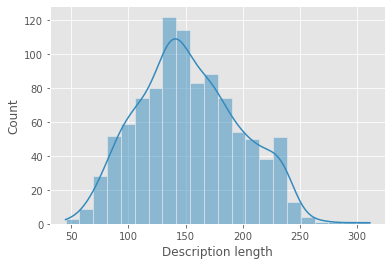

In [117]:
sns.histplot(data=df, x='Description length', kde=True)

Распределение длины описания похоже на нормальное распределение

Создадим новый признак "Decade", в котором хранятся данные о десятилетии, в котором был выпущен фильм

In [118]:
# Разделение года выпуска на декады
df['Decade'] = (df['Year of Release'] // 10) * 10
df.head(3)

,Unnamed: 0,Movie Name,Year of Release,Runtime,Movie Rating,Metascore of Movie,Votes,Gross,Description,Genre 1,Genre 2,Genre 3,Description length,Decade
0,0,Guardians of the Galaxy Vol. 3,2023,150,8.2,64,156973,158.0,"Still reeling from the loss of Gamora, Peter Q...",Action,Adventure,Comedy,183,2020
1,1,John Wick: Chapter 4,2023,169,8.0,78,190955,0.0,John Wick uncovers a path to defeating The Hig...,Action,Crime,Thriller,214,2020
2,2,Spider-Man: Across the Spider-Verse,2023,140,9.1,86,50471,16.0,"Miles Morales catapults across the Multiverse,...",Animation,Action,Adventure,235,2020


Построим график распределения десятилетий, в которые был выпущен фильм

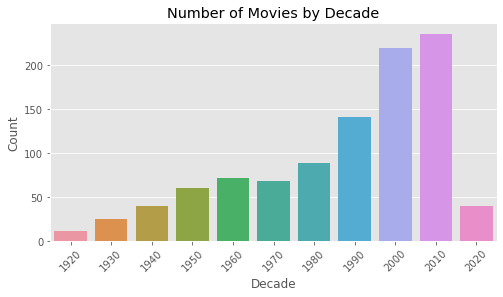

In [119]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Decade')
plt.title('Number of Movies by Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

По графику видно, что больше всего топовые фильмы были выпущены в 90-е, 2000-е и 2010-е годы

Создадим следующую переменную успешности фильма. Присвоим значение 1, если кассовость фильма больше 200 млн долларов и рейтинг больше 8, 0 - иначе


In [120]:
df['Success'] = ((df['Gross'] > 200) & (df['Movie Rating'] > 8)).astype(int)
df.head(3)

,Unnamed: 0,Movie Name,Year of Release,Runtime,Movie Rating,Metascore of Movie,Votes,Gross,Description,Genre 1,Genre 2,Genre 3,Description length,Decade,Success
0,0,Guardians of the Galaxy Vol. 3,2023,150,8.2,64,156973,158.0,"Still reeling from the loss of Gamora, Peter Q...",Action,Adventure,Comedy,183,2020,0
1,1,John Wick: Chapter 4,2023,169,8.0,78,190955,0.0,John Wick uncovers a path to defeating The Hig...,Action,Crime,Thriller,214,2020,0
2,2,Spider-Man: Across the Spider-Verse,2023,140,9.1,86,50471,16.0,"Miles Morales catapults across the Multiverse,...",Animation,Action,Adventure,235,2020,0


In [121]:
df['Success'].value_counts()

0    953
1     47
Name: Success, dtype: int64

Всего "успешных" фильмов 47

Построим график доли успешных фильмов

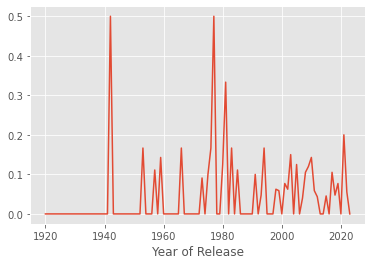

In [122]:
df.groupby('Year of Release')['Success'].mean().plot()
plt.show()

Данный график показывает, как менялась доля успешных фильмов (согласно определению признака Success) в зависимости от года выпуска. Если среднее значение признака Success для конкретного года выше, то это означает, что в этом году было выпущено больше успешных фильмов.

Следующий признак, который мы создадим - наличие слова life в описании фильма. Ранее мы выявили, что слово life чаще всего встречается в описании фильмов. Возможно это влияет на рейтинг фильма, или его кассовость. Присвоим значение 1, если слово life встречается в описании фильма, 0 - иначе

In [123]:
df['Life_in_Description'] = df.apply(lambda row: 1 if 'life' in str(row['Description']).lower() else 0, axis=1)
df['Life_in_Description'].value_counts()

0    884
1    116
Name: Life_in_Description, dtype: int64

Итого, 116 фильмов, которые в описании содержат слово life.

График распределения фильмов со словом life в описании по годам

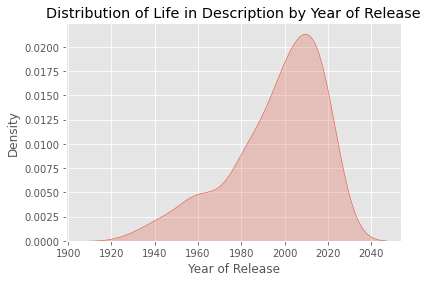

In [124]:
sns.kdeplot(df[df['Life_in_Description']==1]['Year of Release'], shade=True, label='Life in Description')
plt.title('Distribution of Life in Description by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Density')
plt.show()

Видим, что чаще всего слово life использовалось в описании фильмов с 2000-2020

Таким образом, мы создали еще 4 новых признака:
- `Description lenght` - количество символов в описании фильма
- `Decade` - десятилетие выпуска фильма
- `Success` - успешность фильма
- `Life_in_Description` - наличие слова life в описании фильма

## Шаг 6. Гипотезы (максимум 20 баллов)

### Гипотеза №1: 
__Фильмы, содержащие слово "life" в описании, имеют более высокий рейтинг (Movie Rating) по сравнению с другими фильмами.__

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{life} = \mu_{without  life} \\
& H_1: \mu_{life} > \mu_{without  life}
\end{aligned}
$$


Проверка: Сравнить средние значения рейтинга для группы фильмов со словом life и без.

Для выполнения этой задачи необходимо выполнить следующие шаги:

1. Разделить данные на две группы: фильмы с словом "life" в описании и фильмы без этого слова.

In [125]:
films_with_life = df[df['Life_in_Description'] == 1]
films_without_life = df[df['Life_in_Description'] == 0]

2. Извлечь рейтинги двух групп фильмов (нужные нам выборки)

In [126]:
ratings_with_life = films_with_life['Movie Rating']
ratings_without_life = films_without_life['Movie Rating']

3. Получить необходимую информацию об распределениях наших выборок

Text(0.5, 1.0, 'Распределение рейтингов фильмов со словом life в описании')

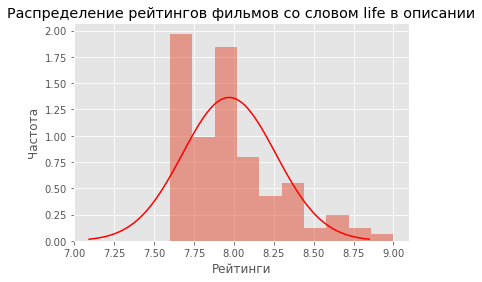

In [127]:
# Параметры для построения графика
mu, sigma = np.mean(ratings_with_life), np.std(ratings_with_life)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.hist(ratings_with_life, bins=10, density=True, alpha=0.5, label='Выборка')
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label='Нормальное распределение')

plt.xlabel('Рейтинги')
plt.ylabel('Частота')
plt.title('Распределение рейтингов фильмов со словом life в описании')

Text(0.5, 1.0, 'Распределение рейтингов фильмов без слова life в описании')

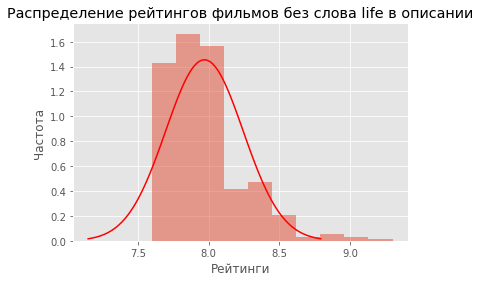

In [128]:
# Параметры для построения графика
mu, sigma = np.mean(ratings_without_life), np.std(ratings_without_life)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.hist(ratings_without_life, bins=10, density=True, alpha=0.5, label='Выборка')
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label='Нормальное распределение')

plt.xlabel('Рейтинги')
plt.ylabel('Частота')
plt.title('Распределение рейтингов фильмов без слова life в описании')

Распределения слабо напоминают нормальные, значит будем использовать специальный тест.
Для проверки данной гипотезы можно использовать непараметрический тест Манна-Уитни. Он позволяет сравнить средние двух независимых выборок, когда распределение не является нормальным, и определить, есть ли статистически значимая разница между ними. 

4. Импортировать модуль mannwhitneyu из scipy.stats и выполнить тест Манна-Уитни для сравнения средних рейтингов двух групп фильмов.

In [129]:
from scipy.stats import mannwhitneyu
statistic, p_value = mannwhitneyu(ratings_with_life, ratings_without_life, alternative='greater')
p_value

0.6223459701723241

В этом коде мы используем функцию mannwhitneyu из модуля scipy.stats для проведения теста Манна-Уитни. Аргумент alternative='greater' указывает, что мы интересуемся только случаем, когда фильмы со словом life имеют более высокий рейтинг, чем другие фильмы. Значение p_value является показателем статистической значимости разницы между выборками. Если p_value меньше выбранного уровня значимости (alpha), то нулевая гипотеза считается подтвергнутой.

5. Проверить статистическую значимость разницы между рейтингами двух групп фильмов.

In [130]:
alpha = 0.05
if p_value < alpha:
    print("Рейтинг фильмов со словом 'life' статистически выше")
else:
    print("Нет статистически значимой разницы в рейтинге фильмов")

Нет статистически значимой разницы в рейтинге фильмов


Поскольку p-значение (0.6223) не меньше 0,05, мы не можем отвергнуть нулевую гипотезу.

### Гипотеза №2: 
__Количество символов в описании фильма (признак 'Description length') оказывает влияние на его рейтинг (признак 'Movie Rating').__

Уровень значимости: $5\%$

- H_0: Средний рейтинг фильмов с большим и маленьким количеством символов в описании одинаков.
- H_1: Фильмы с большим количеством символов в описании имеют более высокий рейтинг по сравнению с фильмами с меньшим количеством символов.


Мы предполагаем, что длина описания фильма может быть связана с его рейтингом. Например, более подробные описания могут привлекать больше внимания зрителей и иметь более высокий рейтинг.

Для проверки этой гипотезы мы будем использовать параметрический тест (корреляционный анализ) и непараметрический тест (коэффициент Спирмена).

1. Параметрический тест (корреляционный анализ) предполагает, что распределение данных нормальное (это мы уже проверили с помощью графиков в предыдущем разделе), и использует коэффициент корреляции Пирсона для измерения силы и статистической значимости линейной связи между двумя переменными.

In [131]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr
# Параметрический тест - коэффициент Пирсона
pearson_corr, pearson_p_value = pearsonr(df['Description length'], df['Movie Rating'])
print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"P-value: {pearson_p_value}")

Pearson correlation coefficient: 0.08222752002896791
P-value: 0.009283962206544422


2. Непараметрический тест (коэффициент Спирмена) не требует предположения о распределении данных и оценивает монотонную связь между двумя переменными.

In [132]:
# Непараметрический тест - коэффициент Спирмена
spearman_corr, spearman_p_value = spearmanr(df['Description length'], df['Movie Rating'])
print(f"Spearman correlation coefficient: {spearman_corr}")
print(f"P-value: {spearman_p_value}")

Spearman correlation coefficient: 0.06637159134786248
P-value: 0.035857186370385506


Исходя из постановки нашей гипотезы, а также результатов тестов, можно сделать следующие выводы:

1. Параметрический тест (коэффициент Пирсона) показал, что между количеством символов в описании фильма и его рейтингом существует слабая положительная линейная связь. Коэффициент корреляции Пирсона равен 0.082, что указывает на очень низкую силу связи. Однако, p-значение равно 0.009, что меньше выбранного уровня значимости (например, 0.05), что позволяет нам отклонить нулевую гипотезу и считать эту связь статистически значимой.

2. Непараметрический тест (коэффициент Спирмена) также показал наличие слабой положительной монотонной связи между количеством символов в описании фильма и его рейтингом. Коэффициент корреляции Спирмена равен 0.066, что подтверждает слабую связь. P-значение равно 0.036, что также меньше выбранного уровня значимости, и мы можем считать эту связь статистически значимой.

Таким образом, наши результаты подтверждают наличие статистически значимой связи между количеством символов в описании фильма и его рейтингом. Однако, степень этой связи является слабой, и другие факторы также могут оказывать влияние на рейтинг фильма. При анализе фильмов следует учитывать не только длину описания, но и актерский состав, жанр, год выпуска и другие, чтобы получить более полное представление о факторах, влияющих на рейтинг фильма.

### Гипотеза №3: 
__Рейтинг фильмов различается в зависимости от жанра: если фильм является драмой (Drama), то рейтинг его будет ниже, чем у фильма Боевика (Action).__

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{Drama} = \mu_{Action} \\
& H_1: \mu_{Drama} < \mu_{Action}
\end{aligned}
$$

В данной гипотезе мы предполагаем, что рейтинг фильмов будет различаться в зависимости от жанра. В частности, мы будем исследовать два наиболее популярных жанра в нашем рейтинге всех фильмов (это мы выяснили из виуализации данных в предыдущем разделе). Нулевая гипотеза ($H_0$) заключается в том, что нет различий в среднем рейтинге между фильмами жанра "Драма" и "Боевик". Альтернативная гипотеза ($H_1$) предполагает, что существуют различия в среднем рейтинге между этими жанрами.

Для проверки этой гипотезы мы можем использовать метод бутстрапа. Бутстрап позволяет оценить различия между выборками путем случайных перестановок и создания распределения различий, на основе которого можно построить доверительные интервалы или вычислить p-значение.

Для выполнения этой задачи необходимо выполнить следующие шаги:

1. Создание выборок для каждого жанра, сохранение размеров подвыборок в отдельные переменные, указание числа будущих бутстрепных выборок

In [133]:
drama_ratings = df[df['Genre 1'] == 'Drama']['Movie Rating']
action_ratings = df[df['Genre 1'] == 'Action']['Movie Rating']

n_drama = len(drama_ratings)
n_action = len(action_ratings)

n_bootstraps = 10000

2. Вычисление разницы в средних рейтингах наблюдаемых выборок

In [134]:
obs_diff = np.mean(drama_ratings) - np.mean(action_ratings)

3. Создание массивв для сохранения разницы в средних рейтингах бутстрепных выборок (пока что заполняем нулями)

In [135]:
bootstrap_diffs = np.zeros(n_bootstraps)

4. Сам бутстрап

In [136]:
np.random.seed(123)
for i in range(n_bootstraps):
    # Случайная выборка с возвращением для жанра "Драма"
    drama_sample = np.random.choice(drama_ratings, size=n_drama, replace=True)
    
    # Случайная выборка с возвращением для жанра "Боевик" 
    action_sample = np.random.choice(action_ratings, size=n_action, replace=True)
    
    # Вычисление разницы в средних рейтингах бутстрепных выборок
    bootstrap_diffs[i] = np.mean(drama_sample) - np.mean(action_sample)

# Вычисление p-значения
p_value = np.mean(bootstrap_diffs >= obs_diff)

# Вывод результатов
print(f"Observation difference: {obs_diff:.4f}")
print(f"p-value: {p_value:.4f}")

Observation difference: -0.0197
p-value: 0.5130


Исходя из полученных результатов, у нас нет оснований отвергнуть нулевую гипотезу о том, что средний рейтинг фильмов жанра "Драма" равен среднему рейтингу фильмов жанра "Боевик", так как полученное p-значение равно 0.5130, что гораздо больше выбранного уровня значимости (0.05).

Таким образом, наши данные не подтверждают предположение о том, что рейтинг фильмов зависит от жанра. Вероятно, другие факторы, такие как актерский состав, режиссура, сценарий и т. д., могут играть более существенную роль в определении рейтинга фильма.

### Гипотеза №4

__Фильмы 20 века в среднем имеют такой же рейтинг, как и фильмы, выпущенные в 21 веке.__


Уровень значимости: $1\%$

$$
\begin{aligned}
& H_0: \mu_{Рейтинг фильмов, выпущенных в 20 веке} = \mu_{Рейтинг фильмов, выпущенных в 21 веке} \\
& H_1: \mu_{Рейтинг фильмов, выпущенных в 20 веке} < \mu_{Рейтинг фильмов, выпущенных в 21 веке}
\end{aligned}
$$

Мы предполагаем, что фильмы 21 века популярнее и интереснее для пользователей, чем фильмы 20 века. Это может быть связано с тем, что в 21 веке благодаря современным эффектам появляются новые жанры кино, которые привлекают зрителей.

Разобъем данные на 2 выборки

In [137]:
movie_20 = df[df['Year of Release'].between(1900, 1999)]
movie_21 = df[df['Year of Release'].between(2000, 2021)]

In [138]:
movie_20.shape

(504, 16)

In [139]:
movie_21.shape

(475, 16)

In [140]:
movie_20.head()

,Unnamed: 0,Movie Name,Year of Release,Runtime,Movie Rating,Metascore of Movie,Votes,Gross,Description,Genre 1,Genre 2,Genre 3,Description length,Decade,Success,Life_in_Description
7,7,Heat,1995,170,8.3,76,676953,67.44,A group of high-end professional thieves start...,Action,Crime,Drama,135,1990,0,0
8,8,The Godfather,1972,175,9.2,100,1910782,134.97,"Don Vito Corleone, head of a mafia family, dec...",Crime,Drama,None,191,1970,0,0
11,11,The Shawshank Redemption,1994,142,9.3,82,2747322,28.34,"Over the course of several years, two convicts...",Drama,None,None,139,1990,0,0
16,16,The Color Purple,1985,154,7.7,78,90646,98.47,A black Southern woman struggles to find her i...,Drama,None,None,121,1980,0,0
22,22,Pulp Fiction,1994,154,8.9,95,2110986,107.93,"The lives of two mob hitmen, a boxer, a gangst...",Crime,Drama,None,143,1990,0,0


In [141]:
movie_21.head()

,Unnamed: 0,Movie Name,Year of Release,Runtime,Movie Rating,Metascore of Movie,Votes,Gross,Description,Genre 1,Genre 2,Genre 3,Description length,Decade,Success,Life_in_Description
3,3,Guardians of the Galaxy,2014,121,8.0,76,1219591,333.18,A group of intergalactic criminals must pull t...,Action,Adventure,Comedy,115,2010,0,0
9,9,Dune,2021,155,8.0,74,679591,108.33,A noble family becomes embroiled in a war for ...,Action,Adventure,Drama,152,2020,0,0
10,10,Interstellar,2014,169,8.7,74,1912318,188.02,When Earth becomes uninhabitable in the future...,Adventure,Drama,Sci-Fi,190,2010,0,0
12,12,Guardians of the Galaxy Vol. 2,2017,136,7.6,67,716313,389.81,The Guardians struggle to keep together as a t...,Action,Adventure,Comedy,180,2010,0,0
13,13,Harry Potter and the Sorcerer's Stone,2001,152,7.6,65,809926,317.58,An orphaned boy enrolls in a school of wizardr...,Adventure,Family,Fantasy,153,2000,0,0


Для того, чтобы выбрать критерий проверки гипотезы, посмотрим на распределения

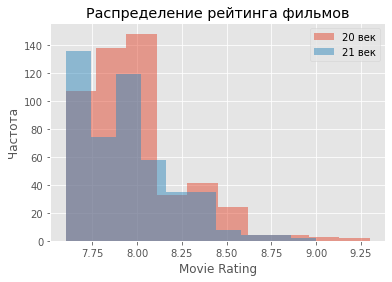

In [142]:
plt.hist(movie_20['Movie Rating'], bins=10, alpha=0.5, label ='20 век')
plt.hist(movie_21['Movie Rating'], bins=10, alpha=0.5, label='21 век')

plt.xlabel('Movie Rating')
plt.ylabel('Частота')
plt.title('Распределение рейтинга фильмов')
plt.legend()
plt.show()

Распределения не похожи на нормальные, поэтому для проверки гипотезы используем непараметрический тест Манна-Уитни

In [143]:
statistic, p_value = mannwhitneyu(movie_20['Movie Rating'], movie_21['Movie Rating'], alternative='less')

if p_value > 0.01:
    print('Нет оснований отвергать нулевую гипотезу. Средние рейтинги фильмов 20 и 21 века равны.')
else:
    print('Отвергаем нулевую гипотезу. Средние рейтинги фильмов 20 и 21 века отличаются.')
print(p_value)

Нет оснований отвергать нулевую гипотезу. Средние рейтинги фильмов 20 и 21 века равны.
0.99932338925902


По результатам теста оказалось, что в среднем рейтинги фильмов, выпущенных в 20 веке и в 21 равны. В целом, это соотносится с реальной картиной, тк в нашей выборке находятся топовые по рейтингу фильмы.

### Гипотеза №5

__Проверим гипотезу о том, что продолжительность фильмов, выпущенных в 20 в среднем равны продолжительности фильмов, выпущенных в 21 веке.__

 
 
Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{Продолжительность фильмов, выпущенных в 20 веке} = \mu_{Продолжительность фильмов, выпущенных в 21 веке} \\
& H_1: \mu_{Продолжительность фильмов, выпущенных в 20 веке} >  \mu_{Продолжительность фильмов, выпущенных в 21 веке}
\end{aligned}
$$ 
 
Мы предполагаем, что в современном мире пользователи предпочитают смотреть фильмы с небольшой продолжительностью, высоко оценивать такие фильмы, благодаря чему они попадают в топ рейтинга. Это может быть связано с тем, что в 21 мире у людей мало времени на просмотр продолжительных фильмов, поэтому в 21 веке продолжительность фильмов сокращается

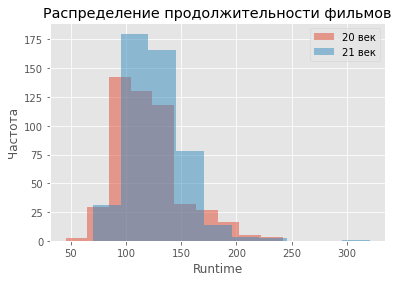

In [144]:
plt.hist(movie_20['Runtime'], bins=10, alpha=0.5, label ='20 век')
plt.hist(movie_21['Runtime'], bins=10, alpha=0.5, label='21 век')

plt.xlabel('Runtime')
plt.ylabel('Частота')
plt.title('Распределение продолжительности фильмов')
plt.legend()
plt.show()

Распределение похоже на нормальное, поэтому используем тест Стьюдента

In [145]:
from scipy.stats import ttest_ind
statistic, p_value = ttest_ind(movie_20['Runtime'], movie_21['Runtime'], alternative='greater')
if p_value > 0.05:
    print('Нет оснований отвергать нулевую гипотезу. Средние продолжительности фильмов 20 и 21 века равны.')
else:
    print('Отвергаем нулевую гипотезу. Средние продолжительности 20 и 21 века отличаются.')
print(p_value)

Нет оснований отвергать нулевую гипотезу. Средние продолжительности фильмов 20 и 21 века равны.
0.9999310525226244


Исходя из полученных результатов, можно сделать вывод о том, что некоторые жанры (например, комедии или драмы) имеют примерно одинаковую продолжительность в обеих эпохах. Также объяснением результата может быть тот факт, что С течением времени технологии производства фильмов улучшаются, что может повлиять на приемлемую продолжительность фильма. Если продолжительность фильма была определена технологическими возможностями, то средняя продолжительность может остаться примерно одинаковой

### Гипотеза №6

__Фильмы, имеющие Votes выше 320 000 имеют более высокую Gross (кассовость)__


Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{Gross фильмов, с высоким Votes} = \mu_{Gross фильмов, с низким Votes} \\
& H_1: \mu_{Gross фильмов, с высоким Votes} > \mu_{Gross фильмов, с низким Votes}
\end{aligned}
$$

На этапе hазведочного анализа мы выявили наибольшую, из всех получившихся, корреляцию для переменных "Votes" и "Gross". Интересно узнать, верно ли, что фильмы, имеющие Votes выше определенного порога (мы выбрали 320000, тк среднее значение Votes = 316611.46), имеют более высокую кассовость.

In [146]:
df['Votes'].mean()

316611.46

In [147]:
votes_high=df[df['Votes']>320000]
votes_low=df[df['Votes']<=320000]

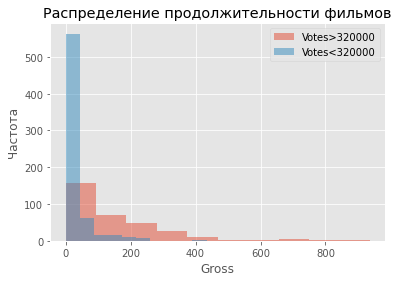

In [148]:
plt.hist(votes_high['Gross'], bins=10, alpha=0.5, label ='Votes>320000')
plt.hist(votes_low['Gross'], bins=10, alpha=0.5, label='Votes<320000')

plt.xlabel('Gross')
plt.ylabel('Частота')
plt.title('Распределение продолжительности фильмов')
plt.legend()
plt.show()

Распределение переменных не похоже на нормальное. Будем использовать непараметрический тест Манна-Уитни.

In [154]:
statistic, p_value = mannwhitneyu(votes_high['Gross'], votes_low['Gross'], alternative='greater')

if p_value > 0.01:
    print('Нет оснований отвергать нулевую гипотезу. Фильмы, имеющие Votes выше 320 000 имеют такую же Gross (кассовость), как и фильмы, имеющие Votes меньше 320 000')
else:
    print('Отвергаем нулевую гипотезу.Фильмы, имеющие Votes выше 320 000 имеют более высокую Gross (кассовость)')
print(p_value)

Отвергаем нулевую гипотезу.Фильмы, имеющие Votes выше 320 000 имеют более высокую Gross (кассовость)
2.1266316057802684e-80


Таким образом, действительно, фильмы с высокими голосами (выше 320 000) приносят большую выручку. Эта информация будет нам полезна для обучения модели 

## Шаг 7. Машинное обучение

### 1. Выбор целевой переменной

Для выполнения задания на предсказание следует выбрать переменную __"Gross"__ (кассовость). Цель состоит в том, чтобы построить модель, которая сможет предсказывать сумму денег с проката фильма на основе доступных признаков.

#### Обоснование:

Предсказание переменной "Gross" может быть полезным для решения задачи прогнозирования кассовых сборов фильма. "Gross" представляет собой сумму денег, собранных с проката фильма, и является важным показателем коммерческого успеха фильма. .

Предсказывая "Gross", мы можем:
1. Оценить потенциальную прибыльность фильма: Зная ожидаемые кассовые сборы, кинокомпании могут оценить, насколько фильм может быть прибыльным и принять решение о его производстве.
2. Определить эффективность маркетинговых кампаний: Предсказание кассовых сборов позволяет оценить эффективность маркетинговых стратегий и кампаний, проводимых для привлечения зрителей. Можно исследовать, какие факторы или признаки оказывают наибольшее влияние на успешность фильма в коммерческом плане.
3. Принять решения о распределении ресурсов: Зная ожидаемые кассовые сборы, можно принять решения о распределении ресурсов, таких как бюджет на производство, маркетинг и распространение фильма.
4. Сравнить успех разных фильмов: Сравнивая предсказанные кассовые сборы разных фильмов, можно определить их относительный успех и оценить факторы, влияющие на этот успех.


Посмотрим на распределение выбранной переменной:

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df.Gross)

Посмотрим, как объясняемая переменная ('Gross') связана с объясняющими ('Year of Release', 'Runtime', 'Movie Rating', 'Metascore of Movie', 'Votes'). Построим для этого облака рассеивания:

In [ ]:
fig, axs = plt.subplots(1, 5, sharey=True)

df.plot(kind='scatter', x='Year of Release', y='Gross', ax=axs[0], figsize=(15, 3))
df.plot(kind='scatter', x='Runtime', y='Gross', ax=axs[1])
df.plot(kind='scatter', x='Movie Rating', y='Gross', ax=axs[2])
df.plot(kind='scatter', x='Metascore of Movie', y='Gross', ax=axs[3])
df.plot(kind='scatter', x='Votes', y='Gross', ax=axs[4])

In [ ]:
features = ['Year of Release', 'Runtime', 'Movie Rating', 'Metascore of Movie', 'Votes']
target = 'Gross'

Пропущенные значения в переменной "Gross" удалим (мы их не заполняли иными значениями, объяснение см. выше). 

In [ ]:
data_cleaned = df.dropna(subset=[target])
data_cleaned.isna().sum()

### 2. Объясняющие переменные

Все объясняющие переменные можно поделить на две части: непрерывные и дискретные (соответственно делать их предобработку нужно по-разному):
- непрерывные переменные принимают любые действительные значения. Будем считать наши переменные 'Year of Release', 'Runtime', 'Metascore of Movie', 'Votes' непрерывными исходя из выше представлненных графиков.
- дискретные принимают значения из ограниченного множества значений. Из полученных графиков можем видеть отчетливые группы значений переменной 'Movie Rating'

##### Пропуски
В наших объясняющих переменных пропусков, к счастью, нет. Это мы выяснили на этапе обработки данных.

### 3. Метрики для оценки качества модели

В данном случае, так как предсказание кассовости является задачей регрессии, мы можем использовать следующие метрики для оценки качества модели:

1. Mean Squared Error (MSE) - средняя квадратичная ошибка. Эта метрика измеряет среднеквадратичное отклонение предсказанных значений от фактических. Чем ближе значение MSE к нулю, тем лучше модель.

2. Root Mean Squared Error (RMSE) - корень из средней квадратичной ошибки. RMSE является предпочтительной метрикой, так как она измеряет среднее абсолютное отклонение предсказанных значений от фактических в исходной шкале данных.

3. Mean Absolute Error (MAE) - средняя абсолютная ошибка. MAE измеряет среднее абсолютное отклонение предсказанных значений от фактических. Она не зависит от квадратичных отклонений и является более устойчивой к выбросам.

### 4. Разбиение выборки на обучающую и тестовую

In [ ]:
X = data_cleaned[features]
y = data_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### 5. Масштабирование признаков

Приведем все признаки к одному масштабу. Это важно для численной устойчивости при работе с данными. Кроме того, для линейных моделей - это ускорение обучения и повышение интерпретируемости модели.

Будем применять StandardScaler в sklearn - нормализацию: вычитание среднего из каждого признака и деление на стандартное отклонение.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 6. Наивный прогноз
Зададим __бейзлайн__ : посчитаем на обучающей выборке средние кассовые сборы и используем это значение в качестве прогноза для всех наблюдений тестовой выборки. C получившимся качеством мы будем сравнивать все остальные модели. 

In [ ]:
y_mean = np.mean(y_train)                     # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали кассаовые сборы

In [ ]:
from sklearn import metrics  # подгружаем метрики

def print_metrics(y_test,y_pred):
    print('MAE:', "%.4f" % metrics.mean_absolute_error(y_test, y_pred))
    print('RMSE:', "%.4f" % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
print_metrics(y_test, y_pred_naive) # узнали получившиеся метрики

### 7. Прогноз!

В выборе модели для предсказания "Gross" можно рассмотреть несколько опций.

# Гипотезы:

Конечно! Вот аналогичные гипотезы, которые могут быть проверены с использованием непараметрических тестов, z-статистики, бутстрапа или теста отношения правдоподобий:

1. Гипотеза: Распределение рейтинга фильмов имеет одинаковую медиану для разных жанров.
   - Для проверки этой гипотезы можно применить непараметрический тест на сравнение медиан, такой как тест Манна-Уитни или Краскел-Уоллис.

2. Гипотеза: Продолжительность фильма (Runtime) имеет нормальное распределение.
   - Для проверки этой гипотезы можно использовать тест на нормальность, например, Шапиро-Уилка или Андерсона-Дарлинга.

3. Гипотеза: Фильмы с высоким рейтингом имеют более высокий средний Metascore по сравнению с фильмами низкого рейтинга.
   - Для проверки этой гипотезы можно применить z-тест для разности средних или бутстрапирование для сравнения средних Metascore фильмов разных рейтингов.

4. Гипотеза: Распределение количества голосов (Votes) имеет тяжелый хвост (тяжелые хвосты).
   - Для проверки этой гипотезы можно использовать тест на асимметрию и эксцесс, такой как тест Жарка-Бера или бутстрапирование для получения доверительных интервалов.

5. Гипотеза: Кассовые сборы (Gross) фильмов разных жанров имеют разные распределения.
   - Для проверки этой гипотезы можно применить тест отношения правдоподобий для сравнения распределений кассовых сборов между жанрами или бутстрапирование для сравнения параметров распределений.

Убедитесь в выборе наиболее подходящего статистического метода в зависимости от ваших данных и цели исследования.

Вот несколько интересных гипотез, которые можно проверить с помощью математической статистики на основе предоставленных данных:

1. Гипотеза: Фильмы определенных жанров имеют большую длительность (Runtime) по сравнению с фильмами других жанров.
   - Проверка: Сравнить средние значения длительности фильмов для разных жанров с использованием t-теста или однофакторного дисперсионного анализа (ANOVA).

2. Гипотеза: Фильмы с более высоким рейтингом (Movie Rating) имеют более высокий кассовый сбор (Gross).
   - Проверка: Вычислить коэффициент корреляции между рейтингом фильмов и их кассовыми сборами, используя коэффициент корреляции Пирсона или Спирмена.

3. Гипотеза: Рейтинг фильма (Movie Rating) зависит от количества голосов (Votes).
   - Проверка: Вычислить коэффициент корреляции между рейтингом фильмов и количеством голосов с помощью коэффициента корреляции Пирсона или Спирмена.

4. Гипотеза: Распределение кассовых сборов (Gross) фильмов является смещенным.
   - Проверка: Построить распределение кассовых сборов и проверить его асимметрию с помощью коэффициента асимметрии (например, коэффициента Скью) и куртозиса (например, коэффициента эксцесса).

5. Гипотеза: Фильмы с высоким рейтингом (Movie Rating) имеют более высокий Metascore.
   - Проверка: Сравнить средние значения Metascore для фильмов с высоким и низким рейтингом с использованием t-теста или дисперсионного анализа.

Убедитесь в выборе наиболее подходящего статистического метода в зависимости от ваших данных и цели исследования.

Гипотеза: Фильмы, являющиеся мультипликационными (содержащие слово "анимация" в описании), имеют более высокий рейтинг (Movie Rating) по сравнению с другими фильмами.

Проверка: Сравнить средние значения рейтинга фильмов для группы мультипликационных фильмов и группы фильмов других жанров с использованием t-теста или непараметрического теста (например, рангового U-теста Манна-Уитни).

Для проверки данной гипотезы можно использовать непараметрический тест Манна-Уитни. Он позволяет сравнить средние ранги двух независимых выборок и определить, есть ли статистически значимая разница между ними. В нашем случае выборками будут фильмы, являющиеся мультипликационными, и фильмы других жанров.

В этом коде мы используем функцию mannwhitneyu из модуля scipy.stats для проведения теста Манна-Уитни. Аргумент alternative='greater' указывает, что мы интересуемся только случаем, когда мультипликационные фильмы имеют более высокий рейтинг, чем фильмы других жанров. Значение p_value является показателем статистической значимости разницы между выборками. Если p_value меньше выбранного уровня значимости (alpha), то гипотеза считается подтвержденной.

# Предсказание: 

Для выполнения задания, где требуется предсказать переменную, следует выбрать переменную "Gross" (кассовость) для предсказания. Цель состоит в том, чтобы построить модель, которая сможет предсказывать сумму денег с проката фильма на основе доступных признаков.

Для решения задачи предсказания "Gross" можно использовать различные модели машинного обучения, такие как линейная регрессия, случайный лес или градиентный бустинг.

Метрикой, которую можно использовать для оценки качества модели, может быть средняя абсолютная ошибка (MAE) или средняя квадратичная ошибка (MSE). MAE измеряет среднее абсолютное отклонение предсказанных значений от фактических, в то время как MSE измеряет среднее квадратичное отклонение.

Предсказание переменной "Gross" может быть полезным для решения задачи прогнозирования кассовых сборов фильма. "Gross" представляет собой сумму денег, собранных с проката фильма, и является важным показателем коммерческого успеха фильма. Предсказание кассовых сборов может помочь кинокомпаниям и инвесторам в принятии решений о производстве, маркетинге и распределении фильмов.

Предсказывая "Gross", мы можем:
1. Оценить потенциальную прибыльность фильма: Зная ожидаемые кассовые сборы, кинокомпании могут оценить, насколько фильм может быть прибыльным и принять решение о его производстве и распределении.
2. Определить эффективность маркетинговых кампаний: Предсказание кассовых сборов позволяет оценить эффективность маркетинговых стратегий и кампаний, проводимых для привлечения зрителей. Можно исследовать, какие факторы или признаки оказывают наибольшее влияние на успешность фильма в коммерческом плане.
3. Принять решения о распределении ресурсов: Зная ожидаемые кассовые сборы, можно принять решения о распределении ресурсов, таких как бюджет на производство, маркетинг и распространение фильма.
4. Сравнить успех разных фильмов: Сравнивая предсказанные кассовые сборы разных фильмов, можно определить их относительный успех и оценить факторы, влияющие на этот успех.

Метрики, которые могут быть использованы для оценки качества модели предсказания "Gross", включают среднюю абсолютную ошибку (MAE), среднеквадратичную ошибку (MSE) и коэффициент детерминации (R^2). Минимизация ошибки и максимизация коэффициента детерминации свидетельствуют о лучшем качестве модели предсказания кассовых сборов фильма.

Вот пример кода для решения задачи предсказания "Gross". В данном коде мы используем модель линейной регрессии для предсказания "Gross" на основе выбранных признаков. Пропущенные значения в переменной "Gross" были удалены. Далее данные были разделены на обучающую и тестовую выборки с помощью функции train_test_split. Признаки были масштабированы с использованием StandardScaler. Затем модель линейной регрессии была обучена на обучающей выборке, а предсказания были сделаны на тестовой выборке. Наконец, мы вычислили MAE и MSE для оценки качества модели.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Выбор признаков и целевой переменной
features = ['Year of Release', 'Runtime', 'Movie Rating', 'Metascore of Movie', 'Votes']
target = 'Gross'

# Удаление пропущенных значений
data_cleaned = data.dropna(subset=[target])

# Разделение на обучающую и тестовую выборки
X = data_cleaned[features]
y = data_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test_scaled)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Вывод результатов
print(f"Средняя абсолютная ошибка (MAE): {mae}")
print(f"Средняя квадратичная ошибка (MSE): {mse}")
